In [ ]:
# Import Pandas library
import pandas as pd

In [ ]:
# Read the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')

In [ ]:
# Visualize the samples
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check the shape of data
data.shape

(150, 6)

In [ ]:
data.iloc[:,1:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Defining input (X) features
X = data.iloc[:,1:5].values

In [ ]:
# Size of X
X.shape

(150, 4)

#**Calculating the Eps value**

Text(0, 0.5, 'Petal Length')

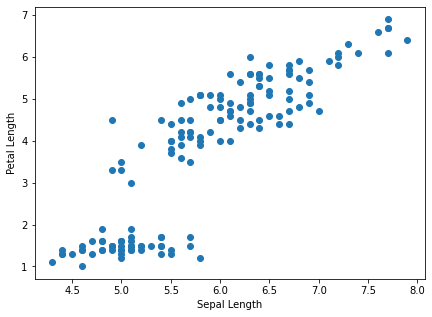

In [ ]:
# How the SepalLength and PetalLength charges are distributed

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,2])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

In [ ]:
# grab the distance between data points
from sklearn.neighbors import NearestNeighbors

neibhours = NearestNeighbors(n_neighbors=4)
neibhours.fit(X)

distances, indices = neibhours.kneighbors(X)

In [ ]:
# sort the distances 
import numpy as np
distances = np.sort(distances, axis=0)

In [ ]:
distances.shape

(150, 4)

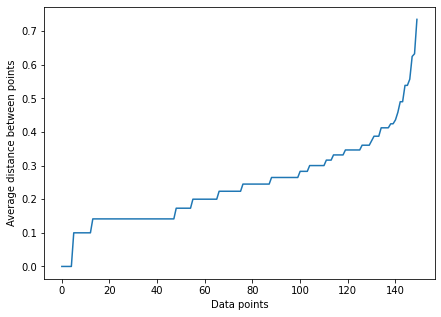

In [ ]:
# plotting the distances
plt.figure(figsize=(7,5))
plt.plot(distances[:,1]) 
plt.xlabel('Data points')
plt.ylabel('Average distance between points')
plt.show()

#**Initializing and training the DBSCAN**

In [ ]:
# Import and initialize DBSCAN
from sklearn.cluster import DBSCAN
density_cluster = DBSCAN(eps = 0.63, min_samples=4)
# Train model
density_cluster.fit(X) 

DBSCAN(eps=0.63, min_samples=4)

In [ ]:
# Predicted result
data['labels'] = density_cluster.labels_

In [ ]:
# Clusters labels
data['labels'].value_counts()

 1    92
 0    50
 2     4
-1     4
Name: labels, dtype: int64

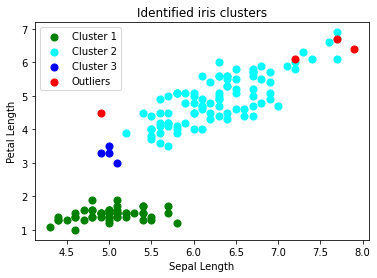

In [ ]:
# Plotting the clusters 
plt.scatter(X[data['labels']  == 0, 0], X[data['labels']  == 0, 2], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[data['labels']  == 1, 0], X[data['labels']  == 1, 2], s = 50, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[data['labels']  == 2, 0], X[data['labels']  == 2, 2], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[data['labels']  == -1, 0], X[data['labels']  == -1, 2], s = 50, c = 'red', label = 'Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Identified iris clusters')
plt.legend()